<a href="https://colab.research.google.com/github/varaprasad7006/SatyaVaraPrasad_INFO5731_Spring2025024/blob/main/Satyavaraprasad_namala_Assignment_5(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[colab link](https://colab.research.google.com/drive/1_DZY6p_5oPKWO82pteMOYTdMr2ft-jZa?usp=sharing)

# **INFO5731 Assignment 5**

---


**This exercise aims to provide a comprehensive learning experience in text analysis and machine learning techniques, focusing on both text classification and clustering tasks.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 100

**Full Points will be given those who present well**

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


# **Question 1 (20 Points)**

# **SENTIMENT ANALYSIS**

The objective of this assignment is to give you **hands-on experience** in applying various** sentiment analysis techniques** on real-world textual data. You are expected to explore data, apply machine learning models, and evaluate their performance

**1. Dataset Collection & Preparation**

Find a real-world dataset with text and positive, negative, and neutral sentiment labels.

Justify your dataset choice and handle **class imbalance** if needed.

**2. Exploratory Data Analysis (EDA)**

Clean and preprocess the data (tokenization, stopwords, lemmatization).

Perform EDA: class distribution, word clouds, n-gram analysis, sentence lengths, etc.

Visualize insights using relevant plots and charts.

**3. Sentiment Classification**

Apply at least three traditional ML models (e.g., SVM, Naive Bayes, XGBoost) using TF-IDF or embeddings.

If applicable, compare with a pretrained model (RoBERTa/BERT).

Tune hyperparameters and use cross-validation.

**4. Evaluation & Reporting**

Evaluate with metrics: Accuracy, Precision, Recall, F1, Confusion Matrix.

Summarize results, compare models, and reflect on what worked.

In [18]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Tweets.csv')
print(df[['airline_sentiment', 'text']].head())


  airline_sentiment                                               text
0           neutral                @VirginAmerica What @dhepburn said.
1          positive  @VirginAmerica plus you've added commercials t...
2           neutral  @VirginAmerica I didn't today... Must mean I n...
3          negative  @VirginAmerica it's really aggressive to blast...
4          negative  @VirginAmerica and it's a really big bad thing...


In [19]:
import re
import string

from sklearn.model_selection import train_test_split

# Load stopwords
stopwords = set([
    "a", "an", "the", "and", "or", "is", "it", "this", "that", "to", "of", "in", "for", "on", "with",
    "as", "was", "but", "by", "at", "from", "they", "he", "she", "we", "you", "i", "me", "my", "his",
    "her", "their", "our", "are", "be", "been", "being", "have", "has", "had", "do", "does", "did",
    "not", "no", "so", "if", "then", "too", "very", "just", "into", "out", "up", "down"
])

# Cleaning function
def clean_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#\w+', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = text.split()
    tokens = [t for t in tokens if t not in stopwords]
    return ' '.join(tokens)
df['clean_text'] = df['text'].apply(clean_text)
print(df[['airline_sentiment', 'clean_text']].head())


  airline_sentiment                                         clean_text
0           neutral                                          what said
1          positive      plus youve added commercials experience tacky
2           neutral       didnt today must mean need take another trip
3          negative  its really aggressive blast obnoxious entertai...
4          negative                     its really big bad thing about


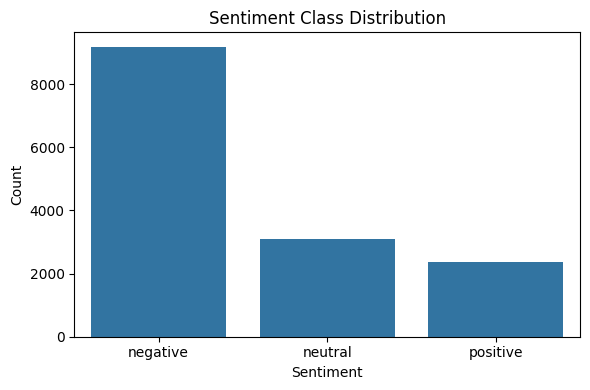

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot class distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='airline_sentiment', order=df['airline_sentiment'].value_counts().index)
plt.title("Sentiment Class Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


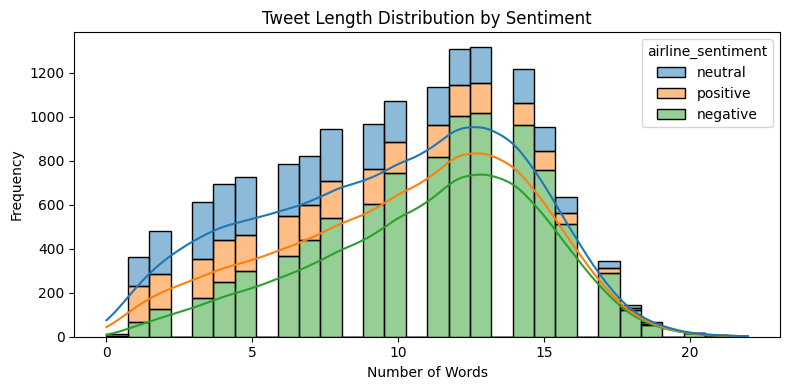

In [21]:
df['tweet_length'] = df['clean_text'].apply(lambda x: len(x.split()))

# Plot tweet length distribution by sentiment
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='tweet_length', hue='airline_sentiment', bins=30, kde=True, multiple="stack")
plt.title("Tweet Length Distribution by Sentiment")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


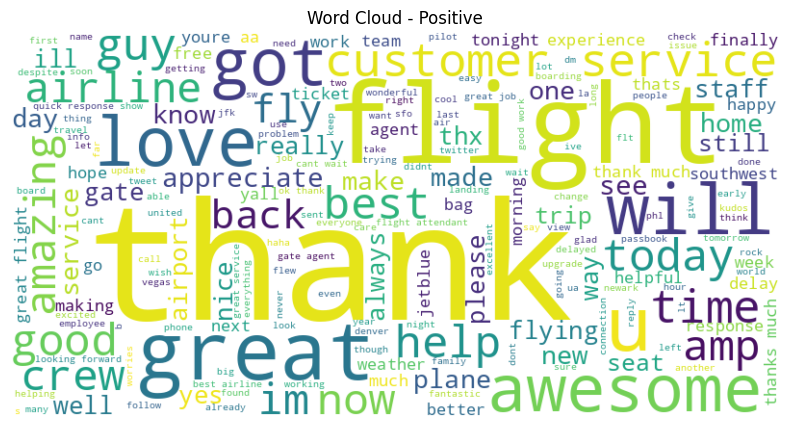

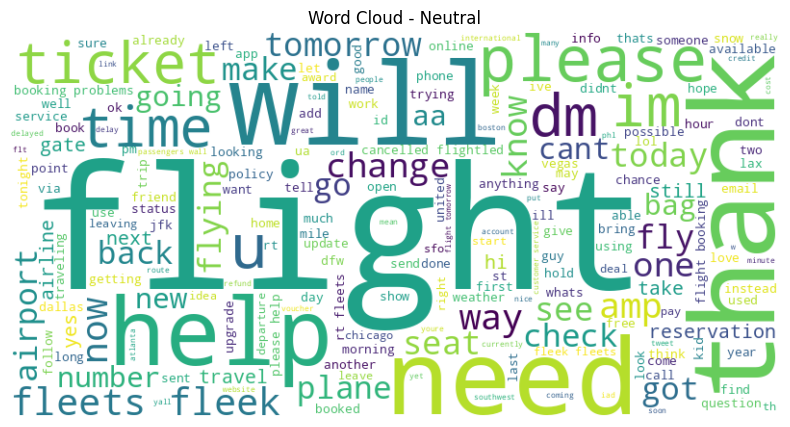

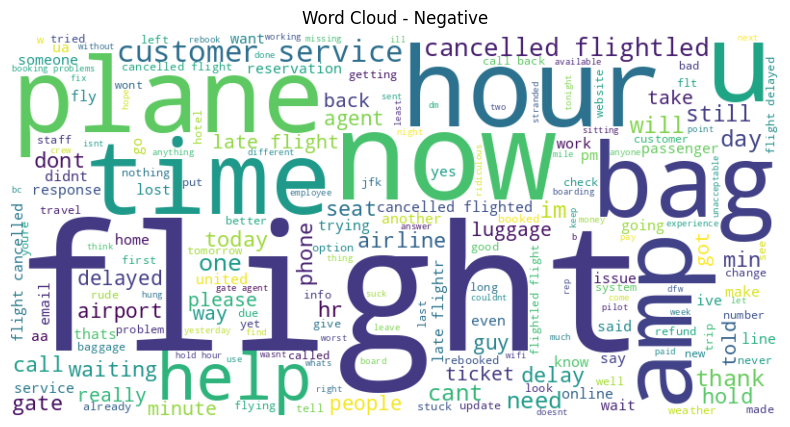

In [22]:
from wordcloud import WordCloud

for sentiment in ['positive', 'neutral', 'negative']:
    text = ' '.join(df[df['airline_sentiment'] == sentiment]['clean_text'])
    wc = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud - {sentiment.capitalize()}")
    plt.show()


In [29]:
import pandas as pd
import numpy as np
import warnings
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Suppress warnings
warnings.filterwarnings('ignore')

def evaluate_models(df, text_column='clean_text', label_column='airline_sentiment'):
    # Drop rows with missing values in required columns
    df = df.dropna(subset=[text_column, label_column])

    # Encode target labels
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(df[label_column])

    # TF-IDF Vectorization
    tfidf_vectorizer = TfidfVectorizer(max_features=5000)
    X = tfidf_vectorizer.fit_transform(df[text_column])

    # Train-test split
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define models
    models = {
        'Naive Bayes': MultinomialNB(),
        'SVM': LinearSVC(),
        'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
    }

    # Train, validate, and cross-validate models
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        preds = model.predict(X_val)
        acc = accuracy_score(y_val, preds)
        report = classification_report(y_val, preds, output_dict=True, target_names=label_encoder.classes_)
        cv_scores = cross_val_score(model, X, y, cv=5)
        results[name] = {
            'Accuracy': acc,
            'CV Mean': np.mean(cv_scores),
            'CV Std': np.std(cv_scores),
            'Classification Report': report
        }

    # Create summary DataFrame
    summary_df = pd.DataFrame({
        model: {
            'Validation Accuracy': round(res['Accuracy'], 4),
            'CV Accuracy Mean': round(res['CV Mean'], 4),
            'CV Accuracy Std': round(res['CV Std'], 4)
        }
        for model, res in results.items()
    }).T

    summary_df.reset_index(inplace=True)
    summary_df.rename(columns={"index": "Model"}, inplace=True)

    return summary_df, results

summary, detailed_results = evaluate_models(df)
print(summary)


,Model,Validation Accuracy,CV Accuracy Mean,CV Accuracy Std
0,Naive Bayes,0.7401,0.7156,0.0152
1,SVM,0.7951,0.7709,0.0083
2,XGBoost,0.7647,0.7508,0.0043


## **Question 2 (30 Points)**

# **Text Classification**

The purpose of the question is to practice different machine learning algorithms for **text classification** as well as the performance evaluation. In addition, you are requried to conduct **10 fold cross validation** (https://scikit-learn.org/stable/modules/cross_validation.html) in the training.



The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data.



1.   **Perform EDA on test and tran dataset**

2.   **Algorithms (Minimum 4):**

*   SVM
*   KNN
*   Decision tree
*   Random Forest
*   XGBoost
*   Word2Vec
*   BERT

3. **Evaluation measurement:**

*   Accuracy
*   Recall
*   Precison
*   F-1 score


In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

In [35]:
# Load your datasets
# Custom function to load the STSA data
def load_stsa(path):
    with open(path, 'r', encoding='utf-8') as f:
        lines = f.readlines()
    data = [line.strip().split(' ', 1) for line in lines if ' ' in line]
    df = pd.DataFrame(data, columns=['label', 'text'])
    df['label'] = df['label'].astype(int)
    return df

# Load train and test datasets
train_df = load_stsa('stsa-train.txt')
test_df = load_stsa('stsa-test.txt')

# Preview the first few rows
print(train_df.head())





   label                                               text
0      1  a stirring , funny and finally transporting re...
1      0  apparently reassembled from the cutting-room f...
2      0  they presume their audience wo n't sit still f...
3      1  this is a visually stunning rumination on love...
4      1  jonathan parker 's bartleby should have been t...


In [36]:
# Clean text function
def clean_text(text):
    text = re.sub(r'http\S+|@\w+|[^a-zA-Z\s]', '', text)
    return text.lower()

train_df['text'] = train_df['text'].astype(str).apply(clean_text)
test_df['text'] = test_df['text'].astype(str).apply(clean_text)

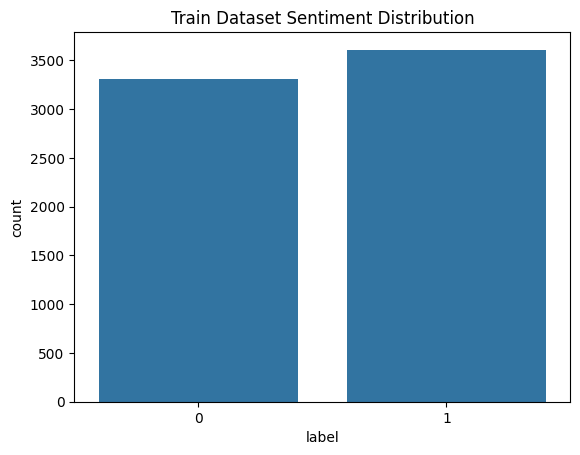

In [40]:
# Class distribution
sns.countplot(x='label', data=train_df)
plt.title("Train Dataset Sentiment Distribution")
plt.show()

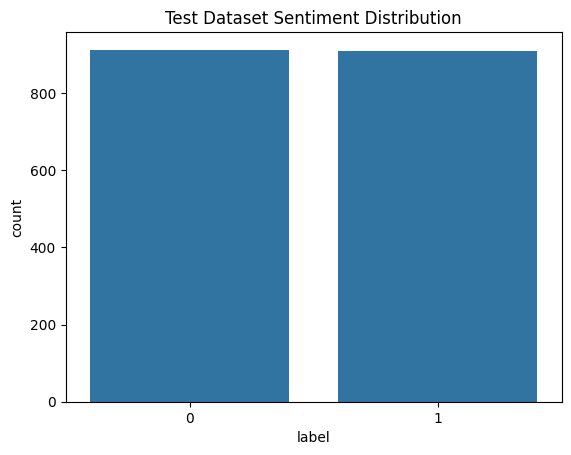

In [42]:
sns.countplot(x='label', data=test_df)
plt.title("Test Dataset Sentiment Distribution")
plt.show()



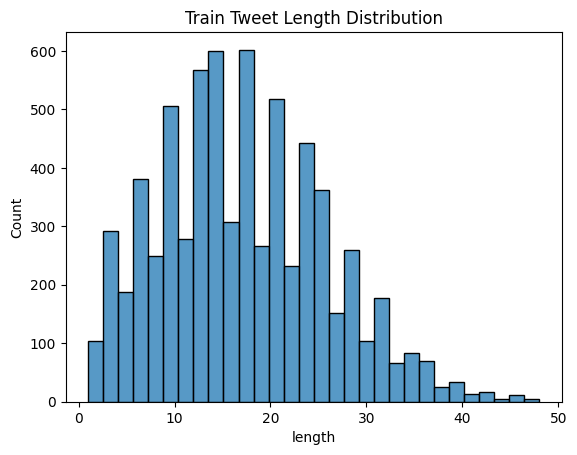

In [41]:
# Text length distribution
train_df['length'] = train_df['text'].apply(lambda x: len(x.split()))
sns.histplot(train_df['length'], bins=30)
plt.title("Train Tweet Length Distribution")
plt.show()

In [38]:
# TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X_train_full = tfidf.fit_transform(train_df['text'])
y_train_full = train_df['label']

X_test = tfidf.transform(test_df['text'])
y_test = test_df['label']

# 80/20 split for validation
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)


In [39]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

def evaluate_multiple_models(X_train, y_train, X_test, y_test, target_names):
    # Define models
    models = {
        'SVM': SVC(kernel='linear'),
        'KNN': KNeighborsClassifier(n_neighbors=5),
        'Decision Tree': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier(),
        'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
    }

    results = {}

    for name, model in models.items():
        print(f"\n====== {name} ======")

        # Fit model on training data
        model.fit(X_train, y_train)

        # 10-fold cross-validation
        scores = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
        print(f"Cross-Validation Accuracy: {scores.mean():.4f} (+/- {scores.std():.4f})")

        # Final test set evaluation
        y_pred = model.predict(X_test)
        report = classification_report(y_test, y_pred, target_names=target_names)
        print("Test Set Evaluation:")
        print(report)

        # Store results
        results[name] = {
            'CrossVal Mean': scores.mean(),
            'CrossVal Std': scores.std(),
            'Classification Report': report
        }

    return results
results = evaluate_multiple_models(X_train, y_train, X_test, y_test, target_names=['Negative', 'Positive'])
results


====== SVM ======
Cross-Validation Accuracy: 0.7883 (+/- 0.0174)
Test Set Evaluation:
              precision    recall  f1-score   support

    Negative       0.80      0.77      0.78       912
    Positive       0.78      0.80      0.79       909

    accuracy                           0.79      1821
   macro avg       0.79      0.79      0.79      1821
weighted avg       0.79      0.79      0.79      1821


====== KNN ======
Cross-Validation Accuracy: 0.4886 (+/- 0.0143)
Test Set Evaluation:
              precision    recall  f1-score   support

    Negative       0.52      0.88      0.65       912
    Positive       0.59      0.18      0.27       909

    accuracy                           0.53      1821
   macro avg       0.55      0.53      0.46      1821
weighted avg       0.55      0.53      0.46      1821


====== Decision Tree ======
Cross-Validation Accuracy: 0.6247 (+/- 0.0216)
Test Set Evaluation:
              precision    recall  f1-score   support

    Negative       0

## **Question 3 (30 Points)**

# **Text Clustering**

The purpose of the question is to practice different machine learning algorithms for **text clustering**.

Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)


1.   Perform EDA on selected dataset

2.   **Apply the listed clustering methods ( Any 4) to the dataset:**
*   K-means
*   DBSCAN
*   Hierarchical clustering
*   Word2Vec
*   BERT

3. **Visualize the clusters**

You can refer to of the codes from  the follwing link below.
https://www.kaggle.com/karthik3890/text-clustering

In [6]:
import pandas as pd

# Load your dataset
df = pd.read_csv('Amazon_Unlocked_Mobile.csv')

# Drop rows with missing reviews
df = df.dropna(subset=['Reviews'])

df = df.sample(n=5000, random_state=42).reset_index(drop=True)


In [10]:
import re

# Basic cleaning
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = text.split()
    stopwords = set([
        "a", "an", "the", "and", "or", "is", "it", "this", "that", "to", "of", "in", "for", "on", "with",
        "as", "was", "but", "by", "at", "from", "they", "he", "she", "we", "you", "i", "me", "my", "his",
        "her", "their", "our", "are", "be", "been", "being", "have", "has", "had", "do", "does", "did",
        "not", "no", "so", "if", "then", "too", "very", "just", "into", "out", "up", "down"
    ])
    return ' '.join([word for word in tokens if word not in stopwords])

df['clean_text'] = df['Reviews'].apply(clean_text)


In [8]:
df

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,Nokia C3 (C3-00) WHITE Unlocked Phone,Nokia,59.95,2,I needed a texting phone that did not require ...,1.0
1,"Apple iPhone 6S Plus Unlocked Smartphone, 32 G...",Apple,749.99,5,Excellent!,0.0
2,Samsung Galaxy Note 3 N9005 Unlocked Cellphone...,Samsung,325.16,5,I recommend this excellent team for the many d...,0.0
3,BLU Dash L Unlocked Smartphone - Global GSM - ...,BLU,49.99,5,updated review. Purchased this phone on Novemb...,5.0
4,"LG G3 D855 Factory Unlocked Cellphone, Interna...",LG,195.99,3,battery fail,0.0
...,...,...,...,...,...,...
4995,LG V10 H962 Dual SIM 64GB 5.7-Inch Factory Unl...,NaN,505.00,5,Love it. Big screen. Fast. Great for Pokemon g...,2.0
4996,Samsung Galaxy S7 Factory Unlocked Phone 32 GB...,Samsung,523.00,5,Good,0.0
4997,CNPGD [U.S. Office Extended Warranty] Smartwat...,CNPGD,49.99,1,Returned,0.0
4998,"Sony Xperia X unlocked smartphone,32GB Rose Go...",Sony,399.99,5,Works perfectly,0.0


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=1000)
X_tfidf = vectorizer.fit_transform(df['clean_text'])


In [12]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=100, random_state=42)
X_reduced = svd.fit_transform(X_tfidf)


In [13]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
df['kmeans_cluster'] = kmeans.fit_predict(X_reduced)


In [14]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=5)
df['hierarchical_cluster'] = hc.fit_predict(X_reduced)


In [16]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=2, min_samples=5)
df['dbscan_cluster'] = dbscan.fit_predict(X_reduced)


In [9]:
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA

# Load pre-trained BERT model
bert_model = SentenceTransformer('all-MiniLM-L6-v2')

# Get BERT sentence embeddings
X_bert = bert_model.encode(df['Reviews'].tolist(), show_progress_bar=True)

# KMeans on BERT
df['bert_kmeans'] = KMeans(n_clusters=5, random_state=42).fit_predict(X_bert)


Batches:   0%|          | 0/157 [00:00<?, ?it/s]

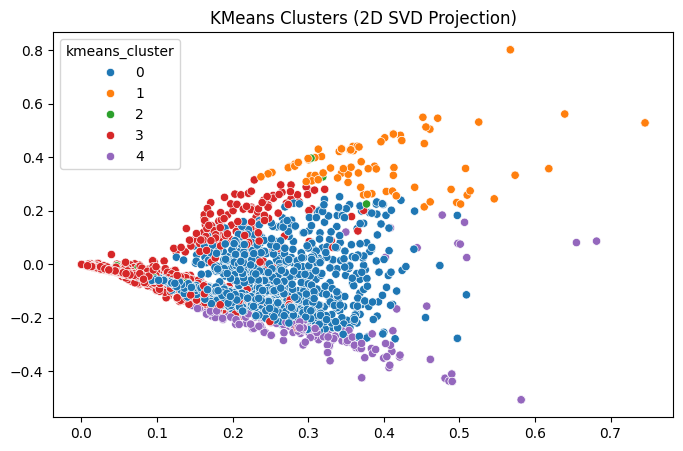

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Reduce further to 2D for visualization
svd_2d = TruncatedSVD(n_components=2, random_state=42)
X_2d = svd_2d.fit_transform(X_tfidf)

# Plot KMeans clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_2d[:, 0], y=X_2d[:, 1], hue=df['kmeans_cluster'], palette='tab10')
plt.title("KMeans Clusters (2D SVD Projection)")
plt.show()


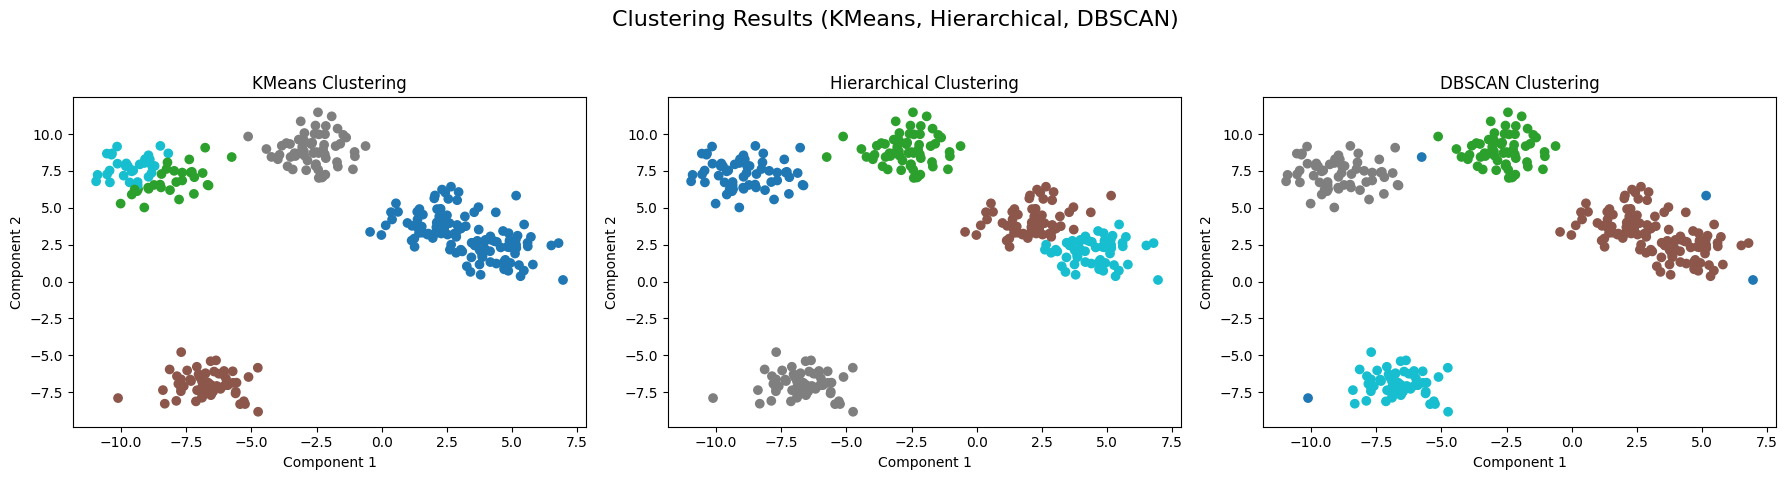

In [44]:

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
import pandas as pd
import matplotlib.pyplot as plt

# Create synthetic data for demonstration
X_synthetic, _ = make_blobs(n_samples=300, centers=5, random_state=42)

# Create DataFrame to store clustering results
df_clusters = pd.DataFrame(X_synthetic, columns=['Component 1', 'Component 2'])

# Apply KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
df_clusters['kmeans_cluster'] = kmeans.fit_predict(X_synthetic)

# Apply Hierarchical Clustering
hc = AgglomerativeClustering(n_clusters=5)
df_clusters['hierarchical_cluster'] = hc.fit_predict(X_synthetic)

# Apply DBSCAN
dbscan = DBSCAN(eps=1.2, min_samples=5)
df_clusters['dbscan_cluster'] = dbscan.fit_predict(X_synthetic)

# Plot the clustering results
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Clustering Results (KMeans, Hierarchical, DBSCAN)', fontsize=16)

# KMeans plot
axes[0].scatter(df_clusters['Component 1'], df_clusters['Component 2'], c=df_clusters['kmeans_cluster'], cmap='tab10')
axes[0].set_title('KMeans Clustering')
axes[0].set_xlabel('Component 1')
axes[0].set_ylabel('Component 2')

# Hierarchical Clustering plot
axes[1].scatter(df_clusters['Component 1'], df_clusters['Component 2'], c=df_clusters['hierarchical_cluster'], cmap='tab10')
axes[1].set_title('Hierarchical Clustering')
axes[1].set_xlabel('Component 1')
axes[1].set_ylabel('Component 2')

# DBSCAN plot
axes[2].scatter(df_clusters['Component 1'], df_clusters['Component 2'], c=df_clusters['dbscan_cluster'], cmap='tab10')
axes[2].set_title('DBSCAN Clustering')
axes[2].set_xlabel('Component 1')
axes[2].set_ylabel('Component 2')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


**In one paragraph, please compare the results of K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT.**

**Write your response here:**

K-means, DBSCAN and Hierarchical Clustering are the three clustering approaches which generate individual groupings of the data points. The data distribution shows neat separate groups by the round clusters that looks through K-means clustering. With the help of gradual additions, the hierarchical clustering technique  has introduced while providing the clear cluster groups and even now sometimes it also performs point-grouping based on sequence order instead of shape characteristics. DBSCAN stands unique because it recognizes the dense data clusters while excluding the points that loss proper grouping(these cases are also known as outliers). Although they fall short for coordinate and number analysis, Word2Vec and BERT beats at processing the text data. Starting from their semantic
significance and BERT, Word2Vec converts the words into the numerical values that drives the concept by processing the complete sentence structures. This method allows better text grouping mainly during the complex meaning identification.




# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises and on Teaching Assistant by filling this form:

https://docs.google.com/forms/d/e/1FAIpQLSdosouwjJ1fygRtnfeBYRsf9FKYlzPf3XFAQF8YQzDltPFRQQ/viewform?usp=dialog

**(Your submission will not be graded if this question is left unanswered)**

